<h1 style="text-align: center; font-weight: bold;">Mall customer analysis</h1>

In today's competitive world, businesses are always looking for ways to improve their performance and increase their profits. Customer analysis plays a critical role in understanding customer behavior and needs, allowing businesses to create targeted marketing campaigns, and offer personalized products and services. In this extension, I conducted a cluster analysis on the customer data taken from mall to gain insights into customer behavior and preferences based on ages, genders, and income.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kmeans import KMeans

%matplotlib inline

# Automatically reload external modules
%load_ext autoreload
%autoreload 2


## **1. Data:**

The dataset used in this project contained information of 200 customers visiting a mall and made purchased. The data included the customer's age, gender, annual income, and spending score, which is a score given to customers based on how much they spend in the mall. The data contains the following columns.

| CustomerID | Gender | Age | Annual Income (k$) | Spending Score (1-100) | 
|--|--|--|--|--|
| ID assigned to customer | gender of customer | age of customer  | income yearly of customer  | score based on how much spent in mall  |


In [2]:
customer_data = pd.read_csv('./data/Mall_Customers.csv')

print(customer_data.head(5))
print(customer_data.info())
customer_data.drop('CustomerID', axis=1, inplace=True)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## **2. Exploratory Data Analysis:**
We started the project with exploratory data analysis to gain insights into the data. We plotted histograms and box plots to understand the distribution and outliers in the data. 

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


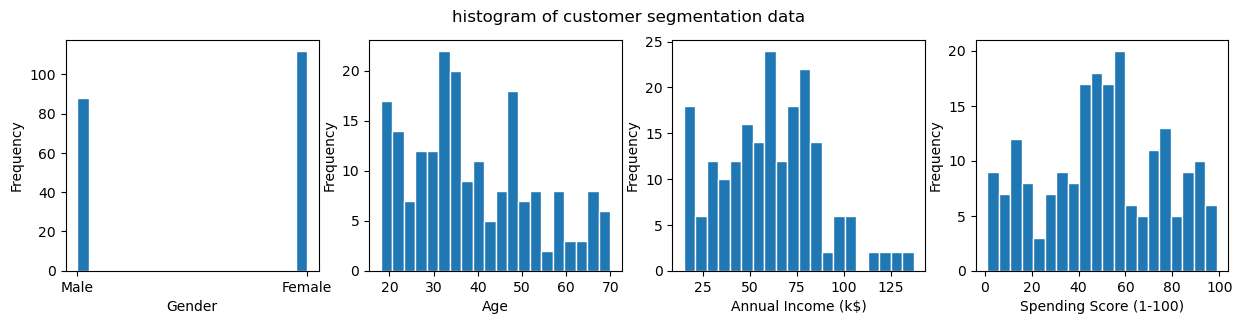

In [3]:
print(customer_data)

fig, ax = plt.subplots(1, customer_data.shape[1])
fig.set_size_inches(15,3)
for i in range(customer_data.shape[1]):
    ax[i].hist(customer_data.iloc[:, i], bins=20, edgecolor='white')
    ax[i].set_xlabel(customer_data.columns[i])
    ax[i].set_ylabel('Frequency')
    
fig.suptitle('histogram of customer segmentation data')

plt.tight_layout
plt.show()

We found that the majority of customers in the mall were between 30 and 50 years old. Specifically, the majority of customers fall into the young adulthood group of approximately 25 years old. Majority of people has an annual income of around 65k$, which reflects accuratly the median income of American in 2023. The spending score was left-skewed, with a majority of customers spending between 40 and 60.

## **3. Cluster Analysis:**
To segment customers based on their spending behavior, we performed K-Means clustering. We selected the number of clusters using the elbow method. We then created a scatter plot to visualize the clusters. We will first plot the original data onto a 3d scatter plot.

  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0   blue   19                  15                      39
1   blue   21                  15                      81
2    red   20                  16                       6
3    red   23                  16                      77
4    red   31                  17                      40


<IPython.core.display.Javascript object>


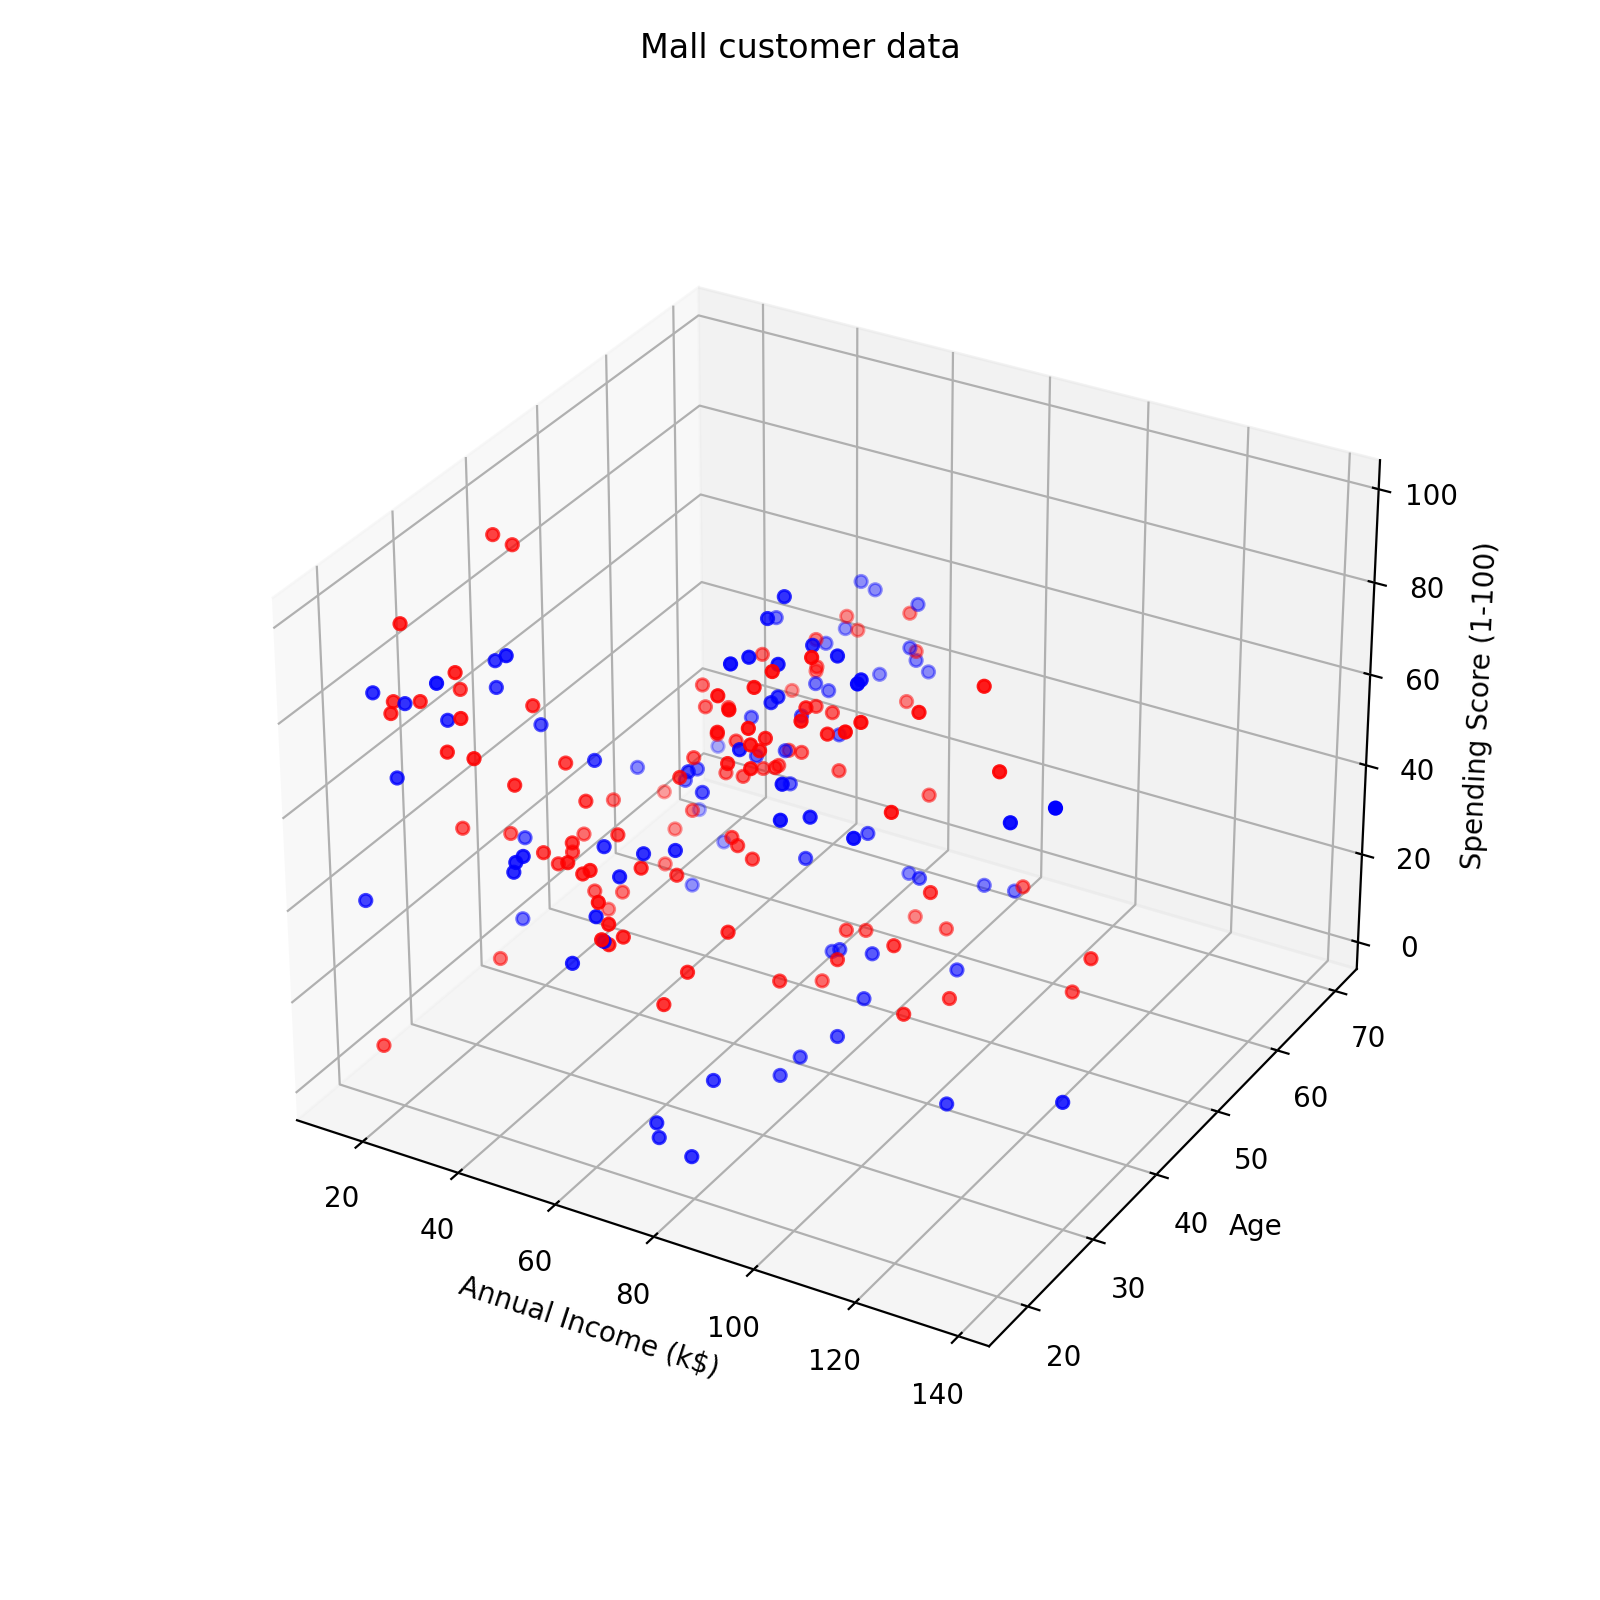

In [4]:
%matplotlib notebook

customer_data['Gender'] = customer_data.Gender.map({'Male': 'blue', 'Female': 'red'})
print(customer_data.head(5))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(customer_data['Annual Income (k$)'], customer_data['Age'], customer_data['Spending Score (1-100)'], c=customer_data['Gender'])

fig.suptitle('Mall customer data')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

We then apply the clustering process. To do so, we first engineered the data for easier processing. The column gender is converted into integer of binary fashion.

In [5]:
cluster_process_data = customer_data.copy()
cluster_process_data['Gender'] = cluster_process_data.Gender.map({'blue': 0, 'red': 1})
print(cluster_process_data.head(5))

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


We then generate an elbow plot to find the number of clusters in our data

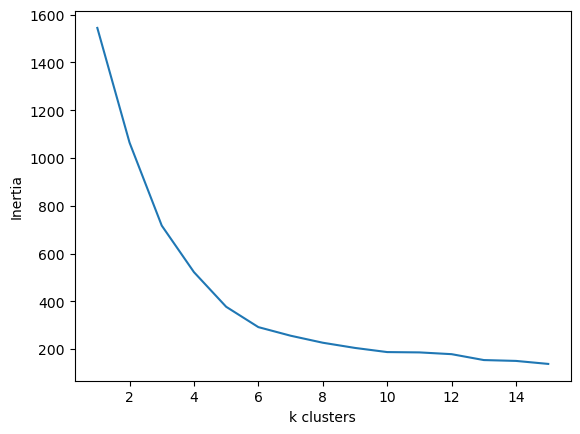

In [7]:
%matplotlib inline

cluster = KMeans(np.array(cluster_process_data))
cluster.elbow_plot(15, 5)

As can be seen from the plot, 6 is the optimal number of clusters in our data. We created a scatter plot to visualize the clusters, which showed that the customers could be segmented into six groups based on their spending score, annual income, age, and gender. 

In [8]:
cluster.cluster_batch(6, 10)
centroids = cluster.get_centroids()

<IPython.core.display.Javascript object>


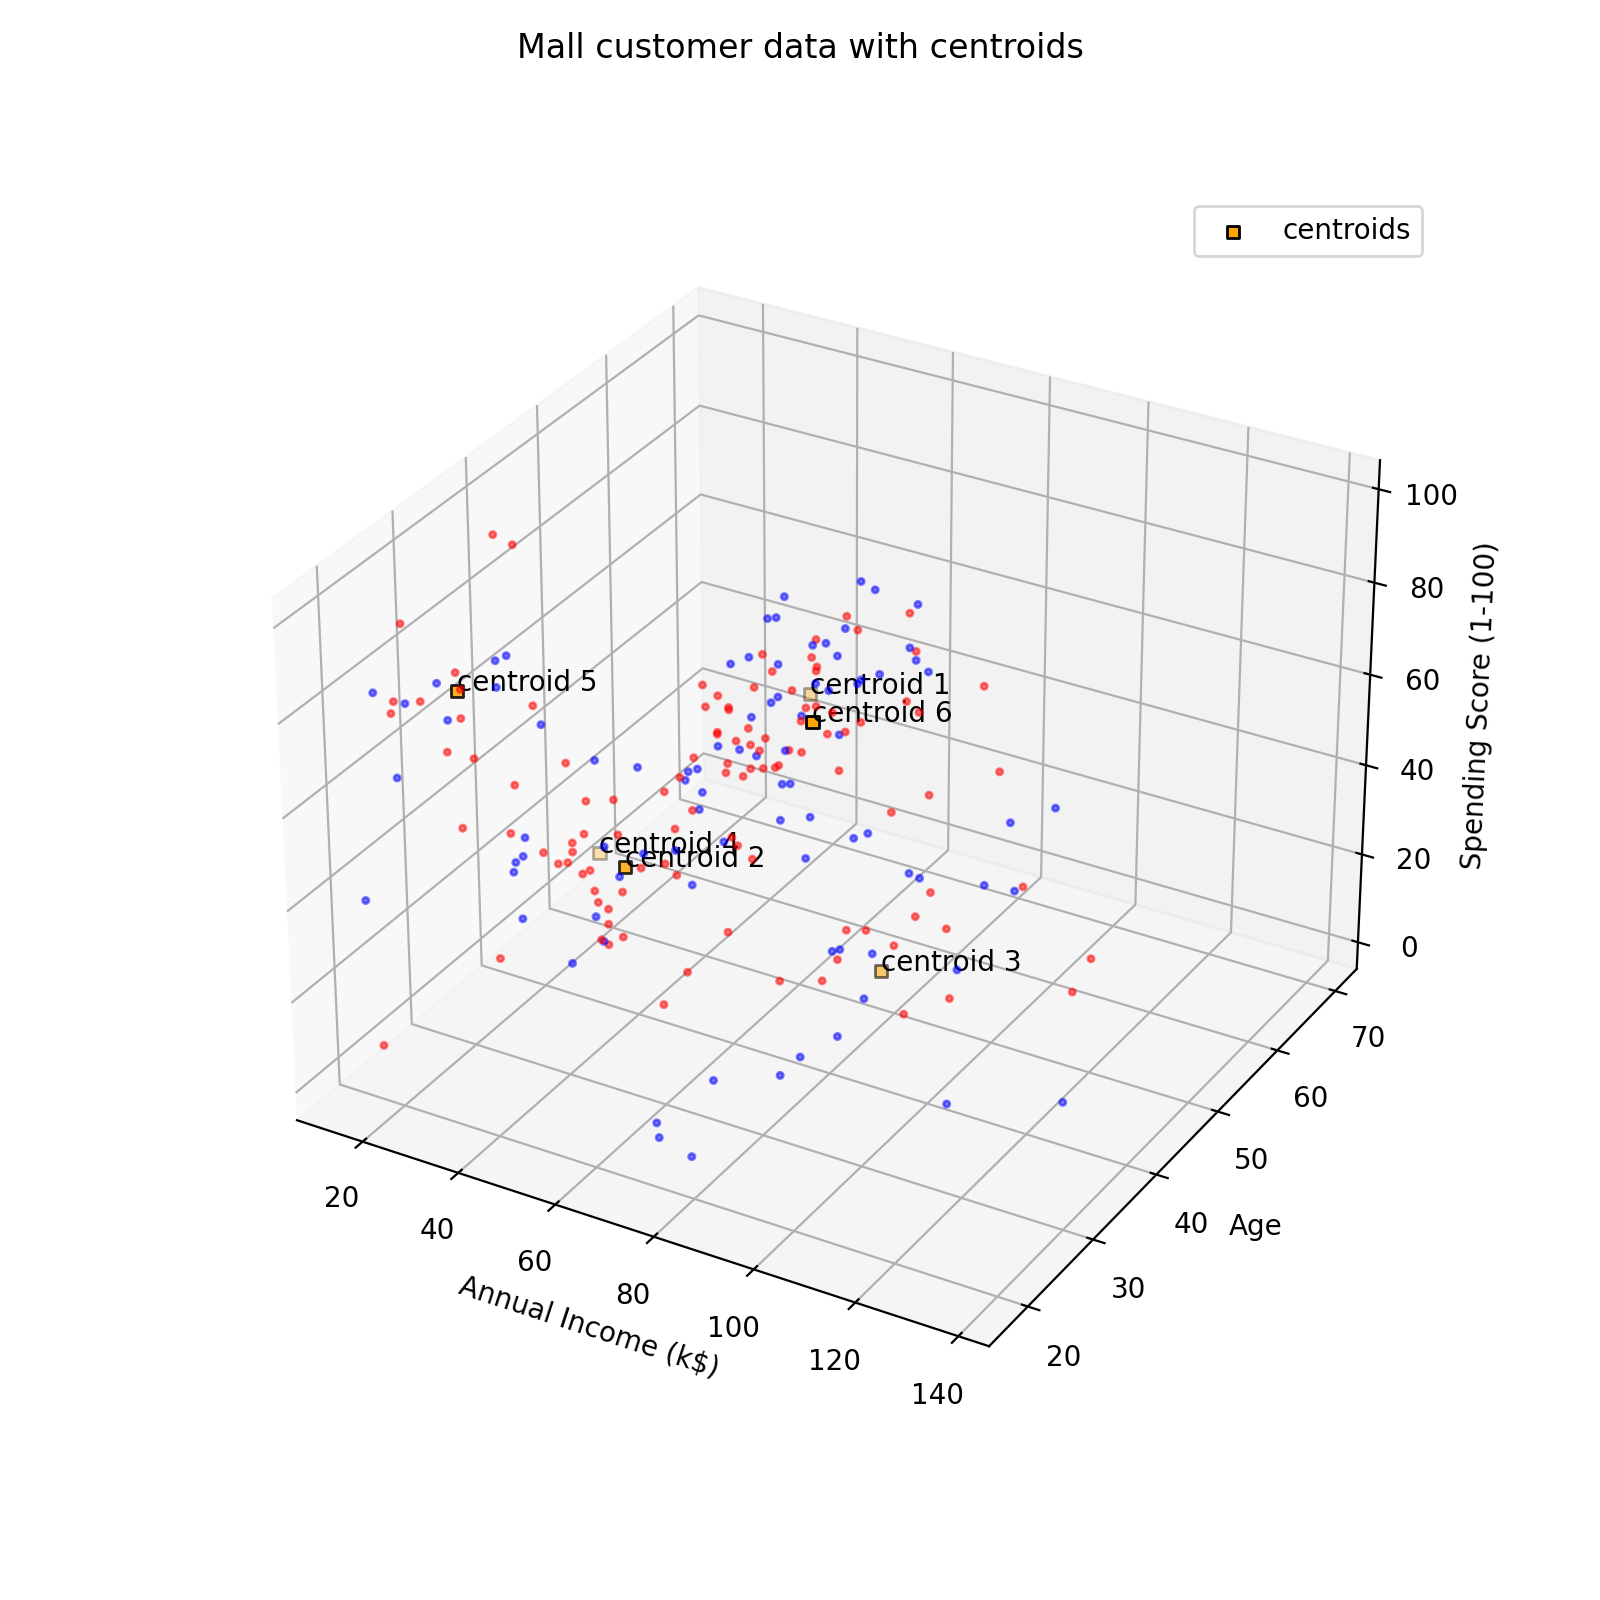

In [9]:
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(customer_data['Annual Income (k$)'], customer_data['Age'], customer_data['Spending Score (1-100)'], c=customer_data['Gender'], marker='.', alpha=.5)
ax.scatter(centroids[:, 2], centroids[:, 1], centroids[:, 3], marker='s', color='orange', edgecolor='black', label='centroids')

for i in range(centroids.shape[0]):
    ax.text(centroids[i, 2], centroids[i, 1], centroids[i, 3], f'centroid {i+1}')


ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')
fig.suptitle('Mall customer data with centroids')

plt.legend()
plt.show()

In [10]:
centroids_df = pd.DataFrame(centroids, columns=['Gender (0-1 equal Male-Female)', 'Age', 'Annual Income', 'Spending Score'], index=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6'])
print(centroids_df)

           Gender (0-1 equal Male-Female)        Age  Annual Income  \
cluster 1                        0.568182  56.340909      53.704545   
cluster 2                        0.657895  27.000000      56.657895   
cluster 3                        0.428571  41.685714      88.228571   
cluster 4                        0.590909  44.318182      25.772727   
cluster 5                        0.590909  25.272727      25.727273   
cluster 6                        0.538462  32.692308      86.538462   

           Spending Score  
cluster 1       49.386364  
cluster 2       49.131579  
cluster 3       17.285714  
cluster 4       20.272727  
cluster 5       79.363636  
cluster 6       82.128205  


## **4. Customer Segments:**
From the centroids data, we analyzed the characteristics of each customer segment to gain insights into their behavior and preferences. The six customer segments were:

- **Cluster 1:** This cluster has a higher proportion of females and relatively younger customers. Their annual income is relatively low, but they have a very high spending score, which means they are spending more than they can afford. (reckless young adult spender)

- **Cluster 2:** This cluster has a lower proportion of females and relatively older customers. Their annual income is high, and they have a low spending score, which means they are more cautious with their spending. (responsible middle age spender)

- **Cluster 3:** This cluster has a similar gender distribution to Cluster 1 but with a slightly older age. Their annual income is also high, and they have a high spending score, which means they are spending what they can afford. (moderate adult spender)

- **Cluster 4:** This cluster has a higher proportion of females and relatively younger customers. Their annual income is moderate, and they have a moderate spending score. (moderate young adult spender)

- **Cluster 5:** This cluster has a similar gender distribution to Cluster 1 but with a much older age. Their annual income is relatively low, and they have a low spending score. (cautious middle age spender)

- **Cluster 6:** This cluster has a similar gender distribution to Cluster 1 but with a much older age. Their annual income is moderate, and they have a moderate spending score. (moderate middle age spender)

Overall, there are some trends that can be derived based on the six spending groups:
- Female tend to spend more than male, with 5 out of 6 clusters incline toward female spenders
- Older customer tend to be more responsible spender. (cluster 1 has the most reckless spenders and cluster 2 has the most cautious spenders)



## **5. Application**
From the analysis, the mall marketing team can modify the strategy to attract the most number of customer and increase revenue. For example, All products can be catered and advertised toward young adult instead of middle age customer with slight emphasis on female customers. For products that are initially targeted toward older customer, the mall can offer discounts to encourage purchasing.

## **6. Conclusion:**
In conclusion, this project provided valuable insights into mall customer behavior and preferences. We segmented customers into six groups based on their spending score and annual income, which helped the mall to create targeted marketing campaigns and offer personalized products and services. The project's findings can help businesses in the retail industry to understand their customers better and improve their performance.


